## Load Packages 

In [64]:
import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [26]:
# load data 
df = pd.read_csv("./etsy.csv")
df.head()

,shop_id,shop_name,is_open,sold_count,additional_customization,active_listing_count,status,location,favorites_count,average_rating,...,currency_code,has_currency_code,accepts_direct_checkout,accepts_paypal,ships_to_country_ids,is_eligible_free_shipping,has_min_free_shipping,has_free_shipping,ships_to_regions,RunDate
0,9811209,PlannerKate1,True,1839198,True,2583,active,"Oak Harbor, Ohio",61367,4.9869,...,USD,True,True,False,"[209, 0, 150, 79, 175]",False,False,False,['ANY'],4/3/22 12:05
1,10204022,CaitlynMinimalist,True,1565708,True,1070,active,"LA, California",258218,4.8767,...,USD,True,True,False,"[79, 167, 290, 284, 209, 61, 58, 74, 105, 55, ...",True,False,True,['ANY'],4/3/22 12:05
2,9901413,Beadboat1,True,1461640,True,8511,active,"Dallas, Texas",59085,4.7952,...,USD,True,True,False,"[70, 118, 146, 90, 151, 79, 207, 91, 71, 215, ...",True,True,True,"['AL', 'AM', 'AU', 'AT', 'BE', 'BG', 'BY', 'BR...",4/3/22 12:05
3,8617622,ModParty,True,1285848,True,1618,active,"Tustin, California",115299,4.8728,...,USD,True,True,False,"[175, 61, 80, 220, 219, 204, 56, 103, 79, 128,...",False,False,False,['US'],4/3/22 12:05
4,5413707,yakutum,True,969314,True,24293,active,"Istanbul, Turkey",36700,4.9373,...,USD,True,True,True,"[209, 167, 127, 0, 203, 61, 131]",False,False,False,['ANY'],4/3/22 12:05


## Stat Summary:

In [8]:
# stat summary 
df.describe()

,shop_id,sold_count,active_listing_count,favorites_count,average_rating,total_rating_count,average_rating_count,geoname_id
count,6.821000e+03,6.821000e+03,6821.000000,6821.000000,6821.000000,6821.000000,6821.000000,6.821000e+03
mean,1.182111e+07,5.410635e+04,833.908078,7544.017006,4.899069,8465.615306,2097.128427,4.412836e+06
std,5.301915e+06,6.610441e+04,1713.912879,9869.686896,0.095504,10983.251610,3220.595331,1.356942e+06
min,5.037340e+06,2.272900e+04,1.000000,188.000000,3.000000,411.000000,2.000000,0.000000e+00
25%,7.471781e+06,2.816300e+04,183.000000,2426.000000,4.870800,3938.000000,670.000000,4.152872e+06
50%,1.053757e+07,3.680900e+04,427.000000,4680.000000,4.924000,5870.000000,1313.000000,4.710178e+06
75%,1.505313e+07,5.675500e+04,928.000000,9061.000000,4.957000,9262.000000,2498.000000,5.359777e+06
max,3.280814e+07,1.839198e+06,83954.000000,258218.000000,5.000000,267763.000000,113772.000000,1.182063e+07


In [43]:
print(min(df['average_rating']))

3.0


## K-Means Clustering:

In [36]:
# K-Means clustering 

# inputs 
features = ["sold_count", "average_rating"]

X = df[features]

z = StandardScaler()

X[features] = z.fit_transform(X[features])

# model
km = KMeans(n_clusters = 5)
km.fit(X)

membership = km.predict(X)
X["cluster"] = membership

print(silhouette_score(X[features], membership))

0.509892169896371


In [47]:
X.head()

,sold_count,average_rating,cluster
0,27.006102,0.919727,2
1,22.868556,-0.234241,2
2,21.294144,-1.087674,2
3,18.634641,-0.275080,2
4,13.845895,0.400337,2


In [30]:
membership

array([2, 2, 2, ..., 3, 3, 1], dtype=int32)

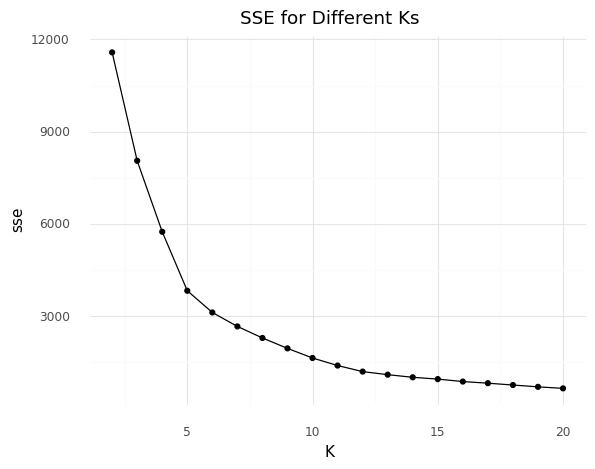

<ggplot: (8779589834412)>

In [31]:
# choosing K
ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

sse = []
sils = []

for k in ks:
    km = KMeans(n_clusters = k)
    km.fit(X)
    
    sse.append(km.inertia_)
    sils.append(silhouette_score(X, km.predict(X)))
    
sse_df = pd.DataFrame({"K": ks,
                      "sse": sse,
                      "silhouette": sils})

(ggplot(sse_df, aes(x = "K", y = "sse")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "SSE for Different Ks"))

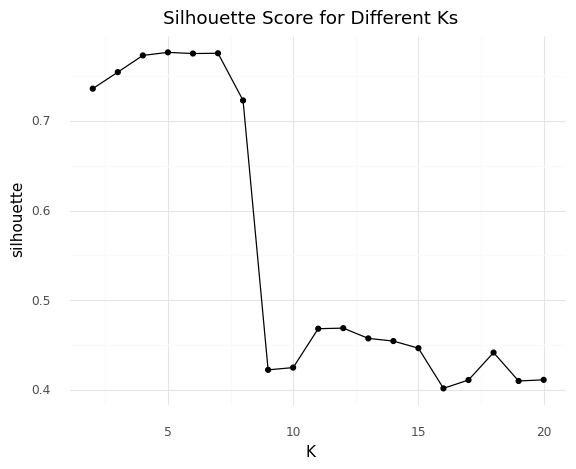

<ggplot: (8779591521826)>

In [37]:
# sil
(ggplot(sse_df, aes(x = "K", y = "silhouette")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "Silhouette Score for Different Ks"))

In [52]:
# add the predicted cluster to the original data set 

km2 = KMeans(n_clusters = 5)
km2.fit(X)

df["cluster"] = km2.predict(X)
df.head()

,shop_id,shop_name,is_open,sold_count,additional_customization,active_listing_count,status,location,favorites_count,average_rating,...,has_currency_code,accepts_direct_checkout,accepts_paypal,ships_to_country_ids,is_eligible_free_shipping,has_min_free_shipping,has_free_shipping,ships_to_regions,RunDate,cluster
0,9811209,PlannerKate1,True,1839198,True,2583,active,"Oak Harbor, Ohio",61367,4.9869,...,True,True,False,"[209, 0, 150, 79, 175]",False,False,False,['ANY'],4/3/22 12:05,3
1,10204022,CaitlynMinimalist,True,1565708,True,1070,active,"LA, California",258218,4.8767,...,True,True,False,"[79, 167, 290, 284, 209, 61, 58, 74, 105, 55, ...",True,False,True,['ANY'],4/3/22 12:05,3
2,9901413,Beadboat1,True,1461640,True,8511,active,"Dallas, Texas",59085,4.7952,...,True,True,False,"[70, 118, 146, 90, 151, 79, 207, 91, 71, 215, ...",True,True,True,"['AL', 'AM', 'AU', 'AT', 'BE', 'BG', 'BY', 'BR...",4/3/22 12:05,3
3,8617622,ModParty,True,1285848,True,1618,active,"Tustin, California",115299,4.8728,...,True,True,False,"[175, 61, 80, 220, 219, 204, 56, 103, 79, 128,...",False,False,False,['US'],4/3/22 12:05,3
4,5413707,yakutum,True,969314,True,24293,active,"Istanbul, Turkey",36700,4.9373,...,True,True,True,"[209, 167, 127, 0, 203, 61, 131]",False,False,False,['ANY'],4/3/22 12:05,3


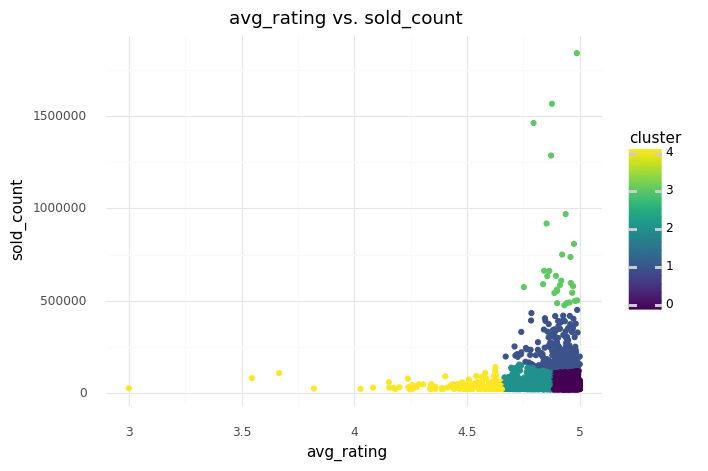

<ggplot: (8779608231858)>

In [53]:
(ggplot(df, aes(x = "average_rating", y = "sold_count", color = "cluster")) + 
geom_point() + theme_minimal() + labs(x = "avg_rating", y = "sold_count", title = "avg_rating vs. sold_count"))

In [55]:
# to view the shop names of cluster 3 
df.loc[df.cluster == 3,"shop_name"].sample(20)

6            PeggySueAlso
27             beadsmaker
22    GLDNxLayeredAndLong
26              PipSupply
12            yadanabeads
17           DigitalCurio
4                 yakutum
11      Worldincensestore
2               Beadboat1
20            BeWellGroup
8     HappyKawaiiSupplies
3                ModParty
5           KJewelryMetal
1       CaitlynMinimalist
24     PrincessBeadSupply
28      HeatherRobertsArt
13      NewMoonBeginnings
16        CreatingUnkamen
15       jewelersparadise
7              ilovelotus
Name: shop_name, dtype: object

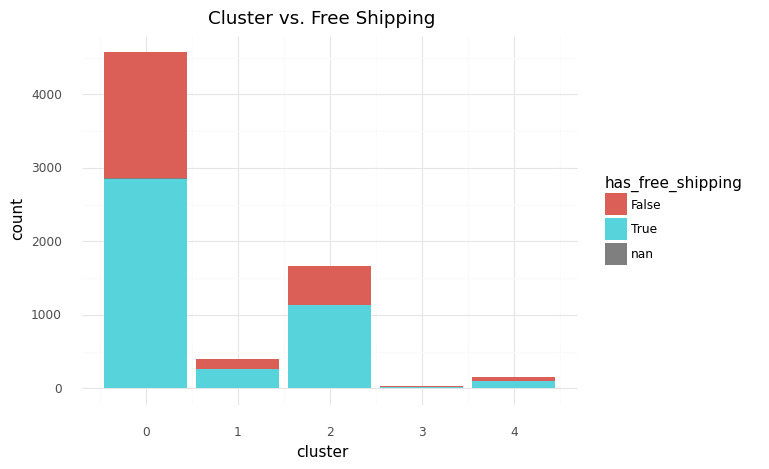

<ggplot: (8779608956076)>

In [56]:
# ggplot of clusters vs free shipping 
(ggplot(df, aes(x = "cluster", fill = "has_free_shipping")) + geom_bar() + theme_minimal() + labs(title = "Cluster vs. Free Shipping"))

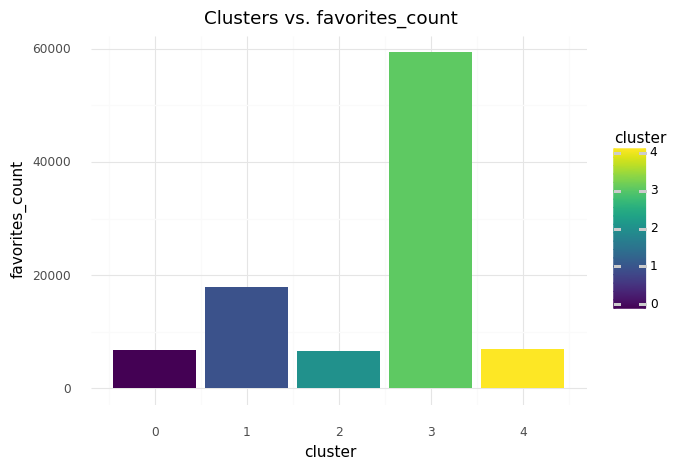

<ggplot: (8779591573881)>

In [57]:
(ggplot(df, aes(x = "cluster", y = "favorites_count", fill = "cluster")) +
 stat_summary(fun_data = "mean_sdl", geom = "bar") +
theme_minimal() + labs(title = "Clusters vs. favorites_count"))

In [60]:
df.columns

Index(['shop_id', 'shop_name', 'is_open', 'sold_count',
       'additional_customization', 'active_listing_count', 'status',
       'location', 'favorites_count', 'average_rating', 'total_rating_count',
       'average_rating_count', 'geoname_id', 'country_code', 'currency_code',
       'has_currency_code', 'accepts_direct_checkout', 'accepts_paypal',
       'ships_to_country_ids', 'is_eligible_free_shipping',
       'has_min_free_shipping', 'has_free_shipping', 'ships_to_regions',
       'RunDate', 'cluster'],
      dtype='object')

## Linear Regression on 'average_rating':

In [70]:
predictors = ['sold_count', 'active_listing_count', 'favorites_count', 'total_rating_count', 'average_rating_count']

x = df[predictors]
Y = df["average_rating"]


# tts
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2)

In [71]:
# size of train and test
print(X_train.shape)
print(X_test.shape)

X_train.head()

(5456, 5)
(1365, 5)


,sold_count,active_listing_count,favorites_count,total_rating_count,average_rating_count
4766,29666,266,1257,4084,1483
3392,36923,463,4910,4968,3933
5447,26959,1234,5033,5131,1860
4442,31095,1262,4588,4074,529
1528,60634,1158,1297,6300,2635


In [72]:
# create and fit
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [73]:
# predictions
y_pred = model.predict(X_test)

In [74]:
# testing R2 -> model is underfit 
model.score(X_test, y_test)

0.00859857277768239

In [75]:
# training R2
model.score(X_train, y_train)

0.017272183153540843

In [76]:
# true vs. pred dataframe 
true_vs_pred = pd.DataFrame({"predicted": y_pred, 
                            "true": y_test})

true_vs_pred

,predicted,true
5260,4.900219,4.9223
851,4.903468,4.9516
5831,4.901400,4.8792
3260,4.899966,4.8662
3669,4.898807,4.8624
...,...,...
3848,4.879194,4.9416
4705,4.898599,4.7756
4148,4.898643,4.8958
824,4.892816,4.9332


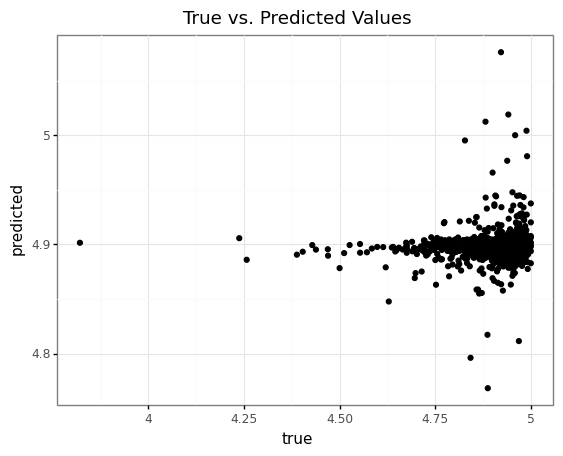

<ggplot: (8779589421520)>

In [83]:
# plot
(ggplot(true_vs_pred, aes(x = "true", y = "predicted")) + geom_point()) + theme_bw() + labs(title = "True vs. Predicted Values")